In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("Dataset/train_with_ext_no_ohe.csv")
test = pd.read_csv("Dataset/test_with_ext_no_ohe.csv")

In [5]:
pd.set_option('display.max_rows', None)

grouped_df = train.groupby(['id_jalan_id_titik_mulai_id_titik_akhir', 'Date', 'Hour'])['rerata_kecepatan'].mean().reset_index()
grouped_df.head(350) 

,id_jalan_id_titik_mulai_id_titik_akhir,Date,Hour,rerata_kecepatan
0,1210_1030634572_1030634588,1,1,45.448
1,1210_1030634572_1030634588,1,2,46.997
2,1210_1030634572_1030634588,1,3,46.556
3,1210_1030634572_1030634588,1,4,47.807
4,1210_1030634572_1030634588,1,6,50.383
5,1210_1030634572_1030634588,1,7,48.576
6,1210_1030634572_1030634588,1,8,45.326
7,1210_1030634572_1030634588,1,9,41.509
8,1210_1030634572_1030634588,1,10,41.776
9,1210_1030634572_1030634588,1,12,35.409


In [6]:
pd.reset_option('display.max_rows')

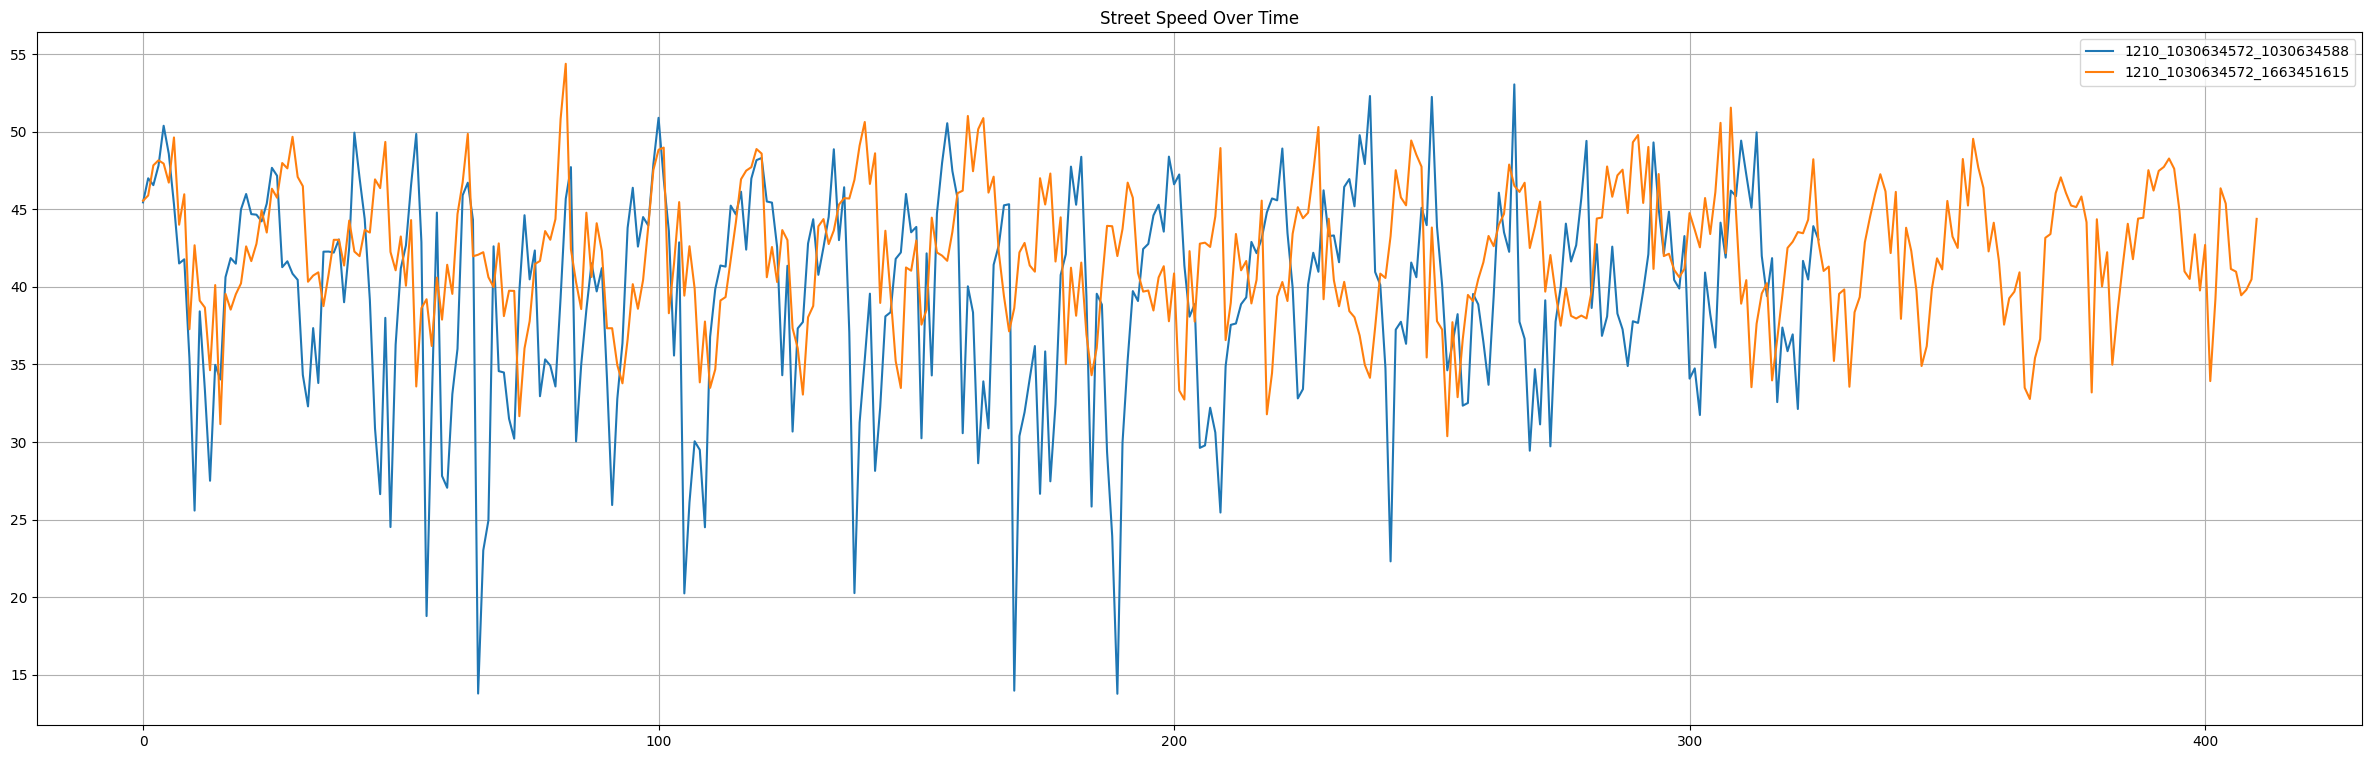

In [7]:
plt.figure(figsize=(30, 9))
plt.title("Street Speed Over Time")

# Assuming grouped_df is the DataFrame containing the data
grouped_df_1 = grouped_df[grouped_df["id_jalan_id_titik_mulai_id_titik_akhir"] == "1210_1030634572_1030634588"].reset_index()
grouped_df_2 = grouped_df[grouped_df["id_jalan_id_titik_mulai_id_titik_akhir"] == "1210_1030634572_1663451615"].reset_index()

# Plotting the data with reset index
grouped_df_1["rerata_kecepatan"].plot()
grouped_df_2["rerata_kecepatan"].plot()

plt.grid()
plt.legend(['1210_1030634572_1030634588', '1210_1030634572_1663451615'])
plt.show()


In [8]:
unique_ids = train["id_jalan_id_titik_mulai_id_titik_akhir"].unique()

len_train = grouped_df["id_jalan_id_titik_mulai_id_titik_akhir"].value_counts().reindex(unique_ids, fill_value=0).values
len_test = test["id_jalan_id_titik_mulai_id_titik_akhir"].value_counts().reindex(unique_ids, fill_value=0).values


df = pd.DataFrame({
    "id_jalan_id_titik_mulai_id_titik_akhir": unique_ids,
    "train_length": len_train,
    "test_length": len_test
    }).sort_values(by='id_jalan_id_titik_mulai_id_titik_akhir')

df["train_length_ratio"] = df["train_length"] / (df["train_length"] + df["test_length"])
df

,id_jalan_id_titik_mulai_id_titik_akhir,train_length,test_length,train_length_ratio
825,1210_1030634572_1030634588,326,102,0.761682
325,1210_1030634572_1663451615,411,132,0.756906
781,1210_1030634588_1030634572,411,132,0.756906
124,1210_1030634588_1701556095,327,101,0.764019
338,1210_1131002278_1663421251,411,134,0.754128
...,...,...,...,...
375,97453767_33203777_3796962982,482,155,0.756672
745,97453767_33203791_20961349,524,168,0.757225
829,97453767_33203791_20961350,492,158,0.756923
62,97453767_3796962982_18126978,482,159,0.751950


<AxesSubplot:>

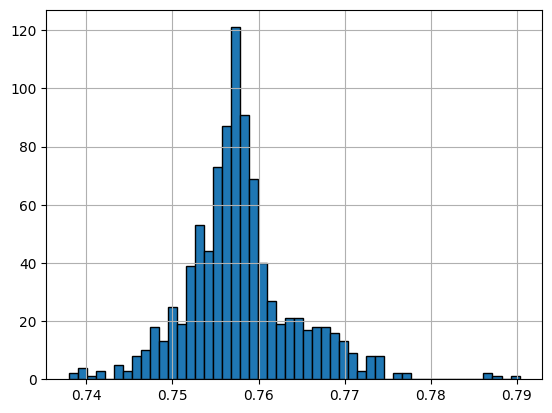

In [9]:
df["train_length_ratio"].hist(bins=50, edgecolor='black')

In [10]:
statistics = df["train_length_ratio"].describe()

print(f"Max Train Length Ratio: {statistics['max']:.2f}")
print(f"Min Train Length Ratio: {statistics['min']:.2f}")
print(f"Standard Deviation of Train Length Ratio: {statistics['std']:.2f}")
print(f"Mean Train Length Ratio: {statistics['mean']:.2f}")
print(f"Median Train Length Ratio: {statistics['50%']:.2f}")

Max Train Length Ratio: 0.79
Min Train Length Ratio: 0.74
Standard Deviation of Train Length Ratio: 0.01
Mean Train Length Ratio: 0.76
Median Train Length Ratio: 0.76


In [11]:
col_to_drop = ['road_type', 'node_awal_ways', 'node_akhir_ways',
       'road_relation', 'road_node', 'max_speed', 'type_highway', "node_awal_ways_minus_node_akhir_ways"]

train = train.drop(col_to_drop, axis=1)
test = test.drop(col_to_drop, axis=1)

In [20]:
train["id_jalan_id_titik_mulai_id_titik_akhir"].unique()

array(['691007296_21390008_1425033102', '47010584_1677092762_579493410',
       '22932408_26486694_1930267566', '142479648_1111592522_3775231113',
       '8504977_5940503398_5940503394', '50841260_5224440152_5224440151',
       '4060819_21539432_227756', '691007296_43405913_27242603',
       '24704286_6343348893_5827426460', '8504977_1623681994_2378872',
       '4060819_227757_114276599', '4061596_21504099_1237102032',
       '4004732_32046542_32046623', '47010584_196051_902515655',
       '3688059_2951577723_25631788', '66924592_111950921_111951162',
       '142479648_26346792_292139', '3691841_17899276_18292997',
       '97453767_33203760_18126978', '4898588_267341420_33776308',
       '3691841_17899643_6285304942', '47010584_196049_1030634577',
       '47010584_902515655_196051', '3691841_301780_18235087',
       '4004732_30427336_32046623', '3688059_299294_18239812',
       '8504977_1697599345_4731051219', '26785612_265111477_294158420',
       '4061596_6012998332_6012998323', '974

In [12]:
def plot_interpolation_for_each_unique_id(unique_id = "1210_1030634572_1030634588", method = "linear", order=None):
    unique_id = unique_id

    train_unique_id = train[train["id_jalan_id_titik_mulai_id_titik_akhir"] == unique_id].drop("id_jalan_id_titik_mulai_id_titik_akhir", axis=1).reset_index().drop("index", axis=1)

    num_days = 22

    # Create a list of dates, repeating each date 24 times for 24 hours
    dates = [date for date in range(1, num_days + 1) for _ in range(24)]

    # Create a list of hours from 0 to 23, repeating for each day
    hours = [hour for _ in range(num_days) for hour in range(24)]

    # Create a dictionary with the data
    data = {
        "Date": dates,
        "Hour": hours
    }

    df = pd.DataFrame(data=data)

    train_unique_nan = df.merge(train_unique_id, on=['Date', 'Hour'], how='left').drop("Day", axis=1)
    print(train_unique_nan.shape)
    print("Number of nan is", train_unique_nan["rerata_kecepatan"].isna().sum())

    # Fill missing values using linear interpolation
    if method == "polynomial":
        train_unique_nan["rerata_kecepatan_filled"] = train_unique_nan["rerata_kecepatan"].interpolate(method=method, order=order)
    else:
        train_unique_nan["rerata_kecepatan_filled"] = train_unique_nan["rerata_kecepatan"].interpolate(method=method)

    
    # Create a beautiful plot
    plt.figure(figsize=(15, 6))
    plt.plot(train_unique_nan.index, train_unique_nan["rerata_kecepatan_filled"], label="Interpolated")
    plt.plot(train_unique_nan.index, train_unique_nan["rerata_kecepatan"], label="Original Data")
    plt.xlabel("Date")
    plt.ylabel("Rerata Kecepatan")
    plt.title(f"Time Series Data with {method} Interpolation", fontsize=15)
    plt.grid()
    plt.legend(fontsize=15)

(528, 3)
Number of nan is 202
(528, 3)
Number of nan is 202
(528, 3)
Number of nan is 202
(528, 3)
Number of nan is 202


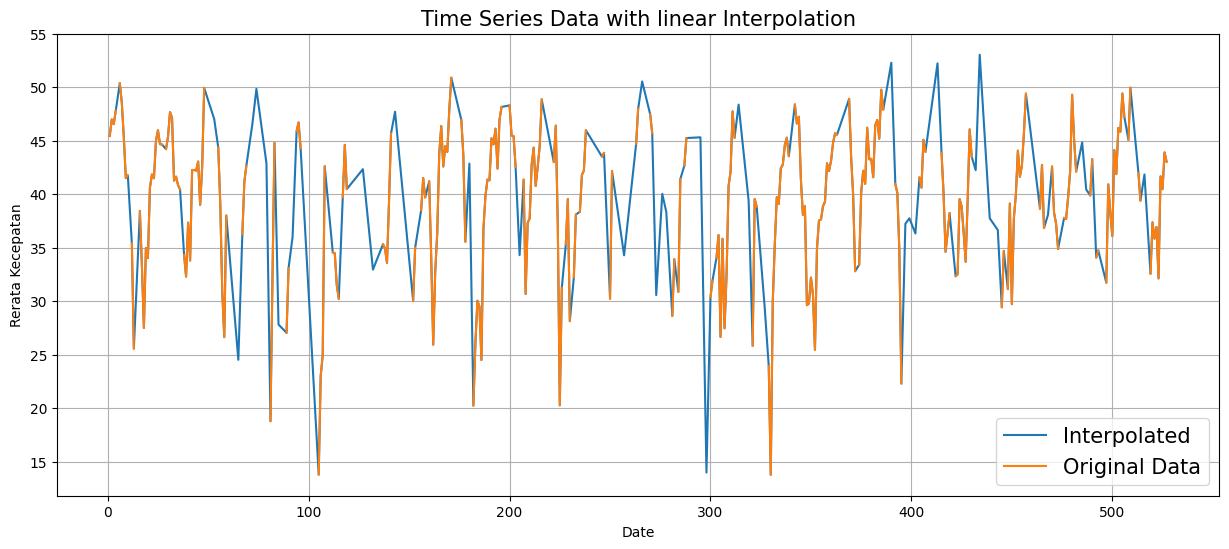

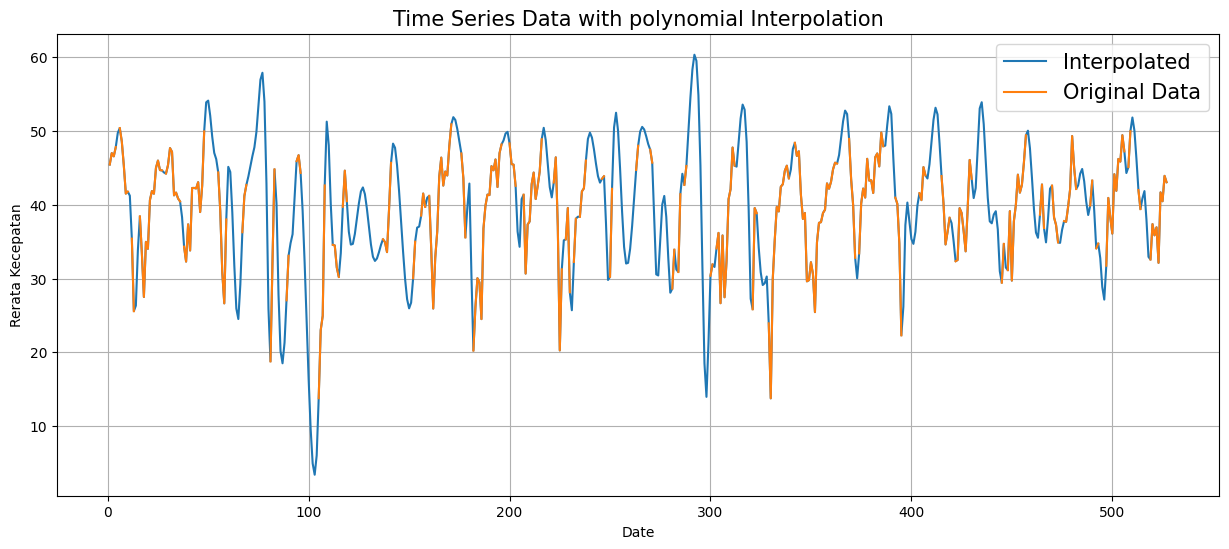

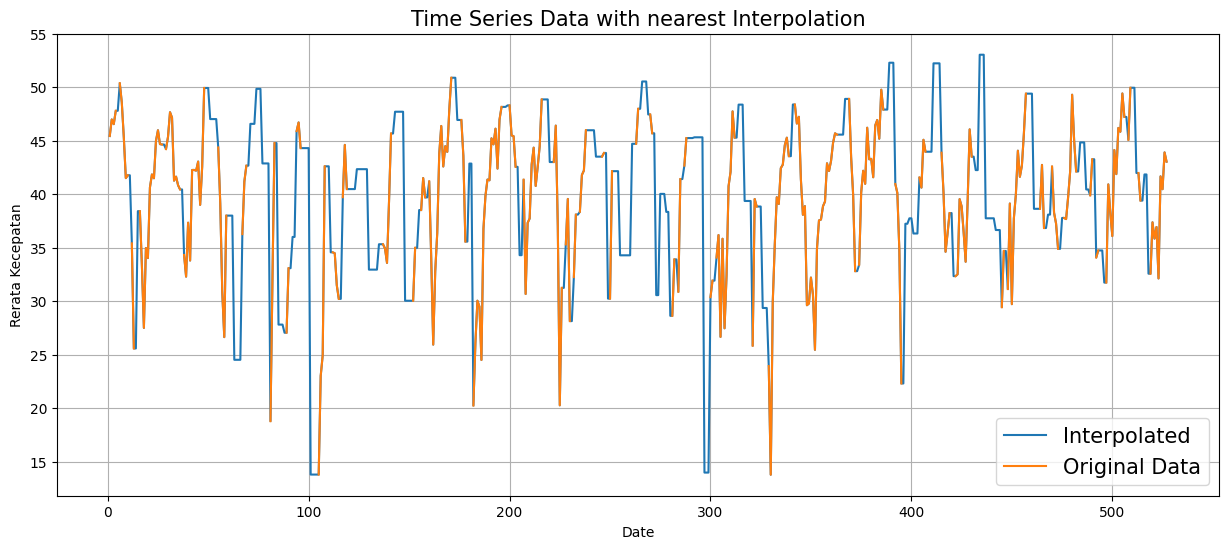

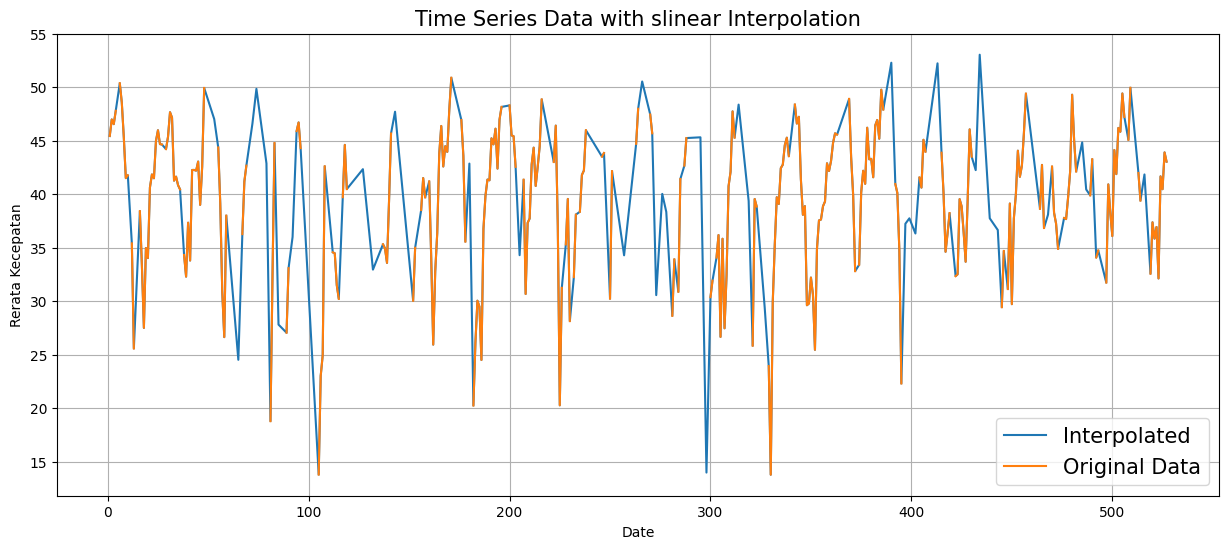

In [18]:
plot_interpolation_for_each_unique_id(method="linear")
plot_interpolation_for_each_unique_id(method="polynomial", order=3)
plot_interpolation_for_each_unique_id(method="nearest")
plot_interpolation_for_each_unique_id(method="slinear") 

In [14]:
test_unique_id = test[test["id_jalan_id_titik_mulai_id_titik_akhir"] == unique_id].drop("id_jalan_id_titik_mulai_id_titik_akhir", axis=1)
test_unique_id

NameError: name 'unique_id' is not defined